# Importing important libraries

In [1]:
import pickle
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
import numpy as np
from sklearn.linear_model import LogisticRegression
import random
import copy
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import cv2

# Reading Training data and Testing data

In [2]:
with open("train_image.pkl", 'rb') as fo:
    train_data = pickle.load(fo, encoding='bytes')
print(len(train_data[0]))
print(len(train_data))
with open("train_label.pkl", 'rb') as fo:
    train_label = pickle.load(fo, encoding='bytes')
print(len(train_label))
with open("test_image.pkl",'rb') as fo:
    actual_test_data = pickle.load(fo, encoding='bytes')

784
8000
8000


### Function to compute accuracy

In [3]:
def accuracy(pred,true):
    count = 0
    for i in range(len(pred)):
        if pred[i] == true[i]:
            count+=1
    return count/len(pred)

### Random Shuffling of Training data

In [4]:
random.Random(6).shuffle(train_data)
random.Random(6).shuffle(train_label)

# Un- Augmented Data

### Function to create train-test split of the given training data

In [5]:
def create_training_and_testing(percent,data,labels):
    size_train = int(percent*len(data))
    train_set = []
    train_label = []
    test_set = []
    test_label = []
    for i in range(size_train):
        train_set.append(data[i])
        train_label.append(labels[i])
    for i in range(size_train,len(data)):
        test_set.append(data[i])
        test_label.append(labels[i])
    return copy.deepcopy(train_set), copy.deepcopy(train_label), copy.deepcopy(test_set), copy.deepcopy(test_label)
train_set, train_set_label, test_set, test_set_label = create_training_and_testing(0.8,train_data,train_label)

Now, i am running various classifiers to see which one is giving me better performance

## 1) Gaussian Naive Bayes

### Function to run 5-fold cross validation

In [6]:
def run_folds_GNB(data,labels,num_of_folds):
    acc = []
    size_fold = int(len(data)/num_of_folds)
    for i in range(num_of_folds):
        train_fold_data = []
        test_fold_data = []
        train_fold_labels = []
        test_fold_labels = []
        start = i*size_fold                                                         # Starting index of test_fold
        end = (i+1)*size_fold                                                       # Ending index of test_fold
        x = range(start,end)
        for j in range(len(data)):
            if j in x:
                test_fold_data.append(data[j])
                test_fold_labels.append(labels[j])
            else:
                train_fold_data.append(data[j])
                train_fold_labels.append(labels[j])
        clf1 = GaussianNB()                                                         # Calling Gaussian Naive Bayes Classifier
        clf1.fit(np.array(train_fold_data),np.array(train_fold_labels))
        pred1 = clf1.predict(test_fold_data)
        acc.append(accuracy(pred1,test_fold_labels))
    acc = np.array(acc)
    return acc, np.argmax(acc)                                                      # Return accuracy list and index of maximum accuracy which will be used as the best fold to run the testing data
acc_GNB ,best_GNB= run_folds_GNB(train_set,train_set_label,5)
print("Accuracies for 5 folds : " + str(acc_GNB))
print("#############")
print("Mean : "+ str(np.mean(acc_GNB)))
print("Standard Deviation : " + str(np.std(acc_GNB)))

Accuracies for 5 folds : [0.61328125 0.64140625 0.6046875  0.63984375 0.63046875]
#############
Mean : 0.6259374999999999
Standard Deviation : 0.014594118036044509


### Function to run the best fold on test-split

In [7]:
def run_best_fold_GNB(data, label, test_data, test_labels, best, num_folds):
    size_fold = int(len(data)/num_folds)
    train_fold_data = []
    train_fold_labels = []
    start = size_fold*best
    end = size_fold*(best+1)
    x = range(start,end)
    for i in range(len(data)):
        if i not in x:
            train_fold_data.append(data[i])
            train_fold_labels.append(label[i])
    clf1 = GaussianNB()
    clf1.fit(np.array(train_fold_data),np.array(train_fold_labels))
    pred1 = clf1.predict(test_data)
    return accuracy(pred1, test_labels)
print("Accuracy : " + str(run_best_fold_GNB(train_set, train_set_label, test_set, test_set_label, best_GNB, 5)))

Accuracy : 0.644375


## 2) Multinomial Naive Bayes

### Function to run 5-fold cross validation

In [8]:
def run_folds_MLB(data,labels,num_of_folds):
    acc = []
    size_fold = int(len(data)/num_of_folds)
    for i in range(num_of_folds):
        train_fold_data = []
        test_fold_data = []
        train_fold_labels = []
        test_fold_labels = []
        start = i*size_fold
        end = (i+1)*size_fold
        x = range(start,end)
        for j in range(len(data)):
            if j in x:
                test_fold_data.append(data[j])
                test_fold_labels.append(labels[j])
            else:
                train_fold_data.append(data[j])
                train_fold_labels.append(labels[j])
        clf1 = MultinomialNB()
        clf1.fit(np.array(train_fold_data),np.array(train_fold_labels))
        pred1 = clf1.predict(test_fold_data)
        acc.append(accuracy(pred1,test_fold_labels))
    acc = np.array(acc)
    return acc, np.argmax(acc)
acc_MNB ,best_MNB= run_folds_MLB(train_set,train_set_label,5)
print("Accuracies for 5 folds : " + str(acc_MNB))
print("#############")
print("Mean : "+ str(np.mean(acc_MNB)))
print("Standard Deviation : " + str(np.std(acc_MNB)))

Accuracies for 5 folds : [0.70859375 0.7328125  0.7203125  0.72890625 0.71640625]
#############
Mean : 0.72140625
Standard Deviation : 0.008679965257706949


### Function to run the best fold on test-split

In [9]:
def run_best_fold_MLB(data, label, test_data, test_labels, best, num_folds):
    size_fold = int(len(data)/num_folds)
    train_fold_data = []
    train_fold_labels = []
    start = size_fold*best
    end = size_fold*(best+1)
    x = range(start,end)
    for i in range(len(data)):
        if i not in x:
            train_fold_data.append(data[i])
            train_fold_labels.append(label[i])
    clf1 = MultinomialNB()
    clf1.fit(np.array(train_fold_data),np.array(train_fold_labels))
    pred1 = clf1.predict(test_data)
    return accuracy(pred1,test_labels)
print("Accuracy : " + str(run_best_fold_MLB(train_set, train_set_label, test_set, test_set_label, best_MNB, 5)))

Accuracy : 0.715


## 3) Logistic Regression

### Code to ignore warnings thrown by sklearn

In [10]:
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

### Function to run 5-fold cross validation

In [11]:
def run_folds_LR(data,labels,num_of_folds):
    acc = []
    size_fold = int(len(data)/num_of_folds)
    for i in range(num_of_folds):
        train_fold_data = []
        test_fold_data = []
        train_fold_labels = []
        test_fold_labels = []
        start = i*size_fold
        end = (i+1)*size_fold
        x = range(start,end)
        for j in range(len(data)):
            if j in x:
                test_fold_data.append(data[j])
                test_fold_labels.append(labels[j])
            else:
                train_fold_data.append(data[j])
                train_fold_labels.append(labels[j])
        clf1 = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(np.array(train_fold_data), np.array(train_fold_labels))
        pred1 = clf1.predict(test_fold_data)
        acc.append(accuracy(pred1,test_fold_labels))
    acc = np.array(acc)
    return acc, np.argmax(acc)
acc_LR ,best_LR= run_folds_LR(train_set,train_set_label,5)
print("Accuracies for 5 folds : " + str(acc_LR))
print("#############")
print("Mean : "+ str(np.mean(acc_LR)))
print("Standard Deviation : " + str(np.std(acc_LR)))

Accuracies for 5 folds : [0.79375    0.79609375 0.7734375  0.80234375 0.8015625 ]
#############
Mean : 0.7934374999999999
Standard Deviation : 0.01051180511972135


### Function to run the best fold on test-split

In [12]:
def run_best_fold_LR(data, label, test_data, test_labels, best, num_folds):
    size_fold = int(len(data)/num_folds)
    train_fold_data = []
    train_fold_labels = []
    start = size_fold*best
    end = size_fold*(best+1)
    x = range(start,end)
    for i in range(len(data)):
        if i not in x:
            train_fold_data.append(data[i])
            train_fold_labels.append(label[i])
    clf1 = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
    clf1.fit(np.array(train_fold_data),np.array(train_fold_labels))
    pred1 = clf1.predict(test_data)
    return accuracy(pred1, test_labels)
print("Accuracy : " + str(run_best_fold_LR(train_set, train_set_label, test_set, test_set_label, best_LR, 5)))

Accuracy : 0.78625


## 4) Multi-layer Perceptron

### Function to run 5-fold cross validation

In [13]:
def run_folds_MLP(data,labels,num_of_folds):
    acc = []
    size_fold = int(len(data)/num_of_folds)
    for i in range(num_of_folds):
        train_fold_data = []
        test_fold_data = []
        train_fold_labels = []
        test_fold_labels = []
        start = i*size_fold
        end = (i+1)*size_fold
        x = range(start,end)
        for j in range(len(data)):
            if j in x:
                test_fold_data.append(data[j])
                test_fold_labels.append(labels[j])
            else:
                train_fold_data.append(data[j])
                train_fold_labels.append(labels[j])
        clf1 = MLPClassifier().fit(np.array(train_fold_data), np.array(train_fold_labels))
        pred1 = clf1.predict(test_fold_data)
        acc.append(accuracy(pred1,test_fold_labels))
    acc = np.array(acc)
    return acc, np.argmax(acc)
acc_MLP ,best_MLP= run_folds_MLP(train_set,train_set_label,5)
print("Accuracies for 5 folds : " + str(acc_MLP))
print("#############")
print("Mean : "+ str(np.mean(acc_MLP)))
print("Standard Deviation : " + str(np.std(acc_MLP)))

Accuracies for 5 folds : [0.78984375 0.80078125 0.7390625  0.803125   0.77421875]
#############
Mean : 0.7814062500000001
Standard Deviation : 0.02350718806290962


### Function to run the best fold on test-split

In [14]:
def run_best_fold_MLP(data, label, test_data, test_labels, best, num_folds):
    size_fold = int(len(data)/num_folds)
    train_fold_data = []
    train_fold_labels = []
    start = size_fold*best
    end = size_fold*(best+1)
    x = range(start,end)
    for i in range(len(data)):
        if i not in x:
            train_fold_data.append(data[i])
            train_fold_labels.append(label[i])
    clf1 = MLPClassifier()
    clf1.fit(np.array(train_fold_data),np.array(train_fold_labels))
    pred1 = clf1.predict(test_data)
    return accuracy(pred1, test_labels)
print("Accuracy : " + str(run_best_fold_MLP(train_set, train_set_label, test_set, test_set_label, best_MLP, 5)))

Accuracy : 0.80875


## 5) ADA Boost

### Function to run 5-fold cross validation

In [15]:
def run_folds_ADA(data,labels,num_of_folds):
    acc = []
    size_fold = int(len(data)/num_of_folds)
    for i in range(num_of_folds):
        train_fold_data = []
        test_fold_data = []
        train_fold_labels = []
        test_fold_labels = []
        start = i*size_fold
        end = (i+1)*size_fold
        x = range(start,end)
        for j in range(len(data)):
            if j in x:
                test_fold_data.append(data[j])
                test_fold_labels.append(labels[j])
            else:
                train_fold_data.append(data[j])
                train_fold_labels.append(labels[j])
        clf1 = AdaBoostClassifier().fit(np.array(train_fold_data), np.array(train_fold_labels))
        pred1 = clf1.predict(test_fold_data)
        acc.append(accuracy(pred1,test_fold_labels))
    acc = np.array(acc)
    return acc, np.argmax(acc)
acc_ADA ,best_ADA= run_folds_ADA(train_set,train_set_label,5)
print("Accuracies for 5 folds : " + str(acc_ADA))
print("#############")
print("Mean : "+ str(np.mean(acc_ADA)))
print("Standard Deviation : " + str(np.std(acc_ADA)))

Accuracies for 5 folds : [0.72265625 0.740625   0.69921875 0.7453125  0.746875  ]
#############
Mean : 0.7309375000000001
Standard Deviation : 0.018050763920815095


### Function to run the best fold on test-split

In [16]:
def run_best_fold_ADA(data, label, test_data, test_labels, best, num_folds):
    size_fold = int(len(data)/num_folds)
    train_fold_data = []
    train_fold_labels = []
    start = size_fold*best
    end = size_fold*(best+1)
    x = range(start,end)
    for i in range(len(data)):
        if i not in x:
            train_fold_data.append(data[i])
            train_fold_labels.append(label[i])
    clf1 = AdaBoostClassifier()
    clf1.fit(np.array(train_fold_data),np.array(train_fold_labels))
    pred1 = clf1.predict(test_data)
    return accuracy(pred1, test_labels)
print("Accuracy : " + str(run_best_fold_ADA(train_set, train_set_label, test_set, test_set_label, best_ADA, 5)))

Accuracy : 0.744375


## 6) Logistic Regression with PCA

Although, difference between test accuracies of Logistic Regression and Multi-Layer Perceptron is 2 %, I chose to go with Logistic Regression while applying PCA because Logistic Regression had lower Standard Deviation across 5 folds as compared to Multi-Layer Perceptron.

### Function to run PCA on a varied set of number of features required to find the optimal value of number of features

[0.7975, 0.795, 0.806875, 0.8075, 0.8, 0.80125, 0.801875, 0.794375, 0.801875, 0.80375]


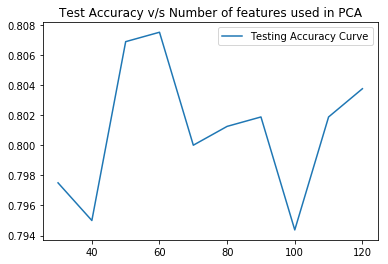

In [17]:
def run_PCA(n_features):
    acc_PCA = []
    for i in n_features:
        pca = PCA(n_components=i).fit(train_data)
        train_data_PCA = pca.transform(train_data)
        train_set_PCA, train_label_PCA, test_set_PCA, test_label_PCA = create_training_and_testing(0.8,train_data_PCA,train_label)
        acc_LR_PCA ,best_LR_PCA= run_folds_LR(train_set_PCA,train_label_PCA,5)
        acc_PCA.append(run_best_fold_LR(train_set_PCA, train_label_PCA, test_set_PCA, test_label_PCA, best_LR_PCA, 5))
    plt.plot(n_features,acc_PCA,label="Testing Accuracy Curve")
    plt.legend()
    plt.title("Test Accuracy v/s Number of features used in PCA")
    plt.plot()
    return acc_PCA
acc_PCA = run_PCA([30,40,50,60,70,80,90,100,110,120])
print(acc_PCA)

In the above plot, we can see that we are getting best accuracy for number of features = 60

# Data Augmentation

### Function to augment additional data to training set

Augmentation is done by adding a mirror image of each data point in the dataset with the same corresponding label to increase the size of the dataset.

In [18]:
def augment_data(data, label):
    train_data_aug = []
    train_label_aug = []
    for i in range(len(data)):
        train_data_aug.append(data[i])
        train_label_aug.append(label[i])
        image = np.array(data[i]).reshape(28,28)
        new_image = cv2.flip(image,+1)
        new_image = new_image.flatten().tolist()
        train_data_aug.append(new_image)
        train_label_aug.append(label[i])
    return copy.deepcopy(train_data_aug), copy.deepcopy(train_label_aug)
train_data_aug, train_label_aug = augment_data(train_data, train_label)

### Random shuffling the augmented data

In [19]:
random.Random(6).shuffle(train_data_aug)
random.Random(6).shuffle(train_label_aug)

### Create train-test split of augmented data

In [20]:
train_set_aug, train_set_label_aug, test_set_aug, test_set_label_aug = create_training_and_testing(0.8,train_data_aug,train_label_aug)

## 1) Gaussian Naive Bayes

In [21]:
acc_GNB_aug ,best_GNB_aug= run_folds_GNB(train_set_aug,train_set_label_aug,5)
print("Accuracies for 5 folds : " + str(acc_GNB_aug))
print("#############")
print("Mean : "+ str(np.mean(acc_GNB_aug)))
print("Standard Deviation : " + str(np.std(acc_GNB_aug)))

Accuracies for 5 folds : [0.65742188 0.65390625 0.65625    0.63554687 0.63242188]
#############
Mean : 0.6471093750000001
Standard Deviation : 0.010821370097231234


In [22]:
print("Accuracy : " + str(run_best_fold_GNB(train_set_aug, train_set_label_aug, test_set_aug, test_set_label_aug, best_GNB_aug, 5)))

Accuracy : 0.655625


## 2) Multinomial Naive Bayes

In [23]:
acc_MNB_aug ,best_MNB_aug= run_folds_MLB(train_set_aug,train_set_label_aug,5)
print("Accuracies for 5 folds : " + str(acc_MNB_aug))
print("#############")
print("Mean : "+ str(np.mean(acc_MNB_aug)))
print("Standard Deviation : " + str(np.std(acc_MNB_aug)))

Accuracies for 5 folds : [0.73398438 0.71367187 0.71328125 0.7125     0.70976562]
#############
Mean : 0.7166406249999999
Standard Deviation : 0.008778552744117353


In [24]:
print("Accuracy : " + str(run_best_fold_MLB(train_set_aug, train_set_label_aug, test_set_aug, test_set_label_aug, best_MNB_aug, 5)))

Accuracy : 0.7253125


## 3) Logistic Classifier

In [25]:
acc_LR_aug ,best_LR_aug= run_folds_LR(train_set_aug,train_set_label_aug,5)
print("Accuracies for 5 folds : " + str(acc_LR_aug))
print("#############")
print("Mean : "+ str(np.mean(acc_LR_aug)))
print("Standard Deviation : " + str(np.std(acc_LR_aug)))

Accuracies for 5 folds : [0.81992188 0.78984375 0.81953125 0.7921875  0.78789062]
#############
Mean : 0.8018750000000001
Standard Deviation : 0.014639632770539389


In [26]:
print("Accuracy : " + str(run_best_fold_LR(train_set_aug, train_set_label_aug, test_set_aug, test_set_label_aug, best_LR_aug, 5)))

Accuracy : 0.8165625


## 4) Multi Layer Perceptron

In [27]:
acc_MLP_aug ,best_MLP_aug= run_folds_MLP(train_set_aug,train_set_label_aug,5)
print("Accuracies for 5 folds : " + str(acc_MLP_aug))
print("#############")
print("Mean : "+ str(np.mean(acc_MLP_aug)))
print("Standard Deviation : " + str(np.std(acc_MLP_aug)))

Accuracies for 5 folds : [0.803125   0.81132812 0.821875   0.79960937 0.7890625 ]
#############
Mean : 0.8049999999999999
Standard Deviation : 0.011057930730080115


In [28]:
print("Accuracy : " + str(run_best_fold_MLP(train_set_aug, train_set_label_aug, test_set_aug, test_set_label_aug, best_MLP_aug, 5)))

Accuracy : 0.8253125


## 5) ADABoost

In [29]:
acc_ADA_aug ,best_ADA_aug= run_folds_ADA(train_set_aug,train_set_label_aug,5)
print("Accuracies for 5 folds : " + str(acc_ADA_aug))
print("#############")
print("Mean : "+ str(np.mean(acc_ADA_aug)))
print("Standard Deviation : " + str(np.std(acc_ADA_aug)))

Accuracies for 5 folds : [0.75117188 0.74101562 0.76484375 0.72890625 0.71210938]
#############
Mean : 0.739609375
Standard Deviation : 0.018128703824149984


In [30]:
print("Accuracy : " + str(run_best_fold_ADA(train_set_aug, train_set_label_aug, test_set_aug, test_set_label_aug, best_ADA_aug, 5)))

Accuracy : 0.7553125


## 6) Multi-Layer Perceptron with PCA

I used Multi-Layer Perceptron with PCA because I was getting highest test accuracy with Multi-Layer Perceptron and Standard Deviation was also lower compared to other classifier models. And also, since I have increased the size of data, Multi-Layer Perceptron now has access to more data and hence, should be able to learn more and give better accuracy

[0.8140625, 0.82625, 0.84625, 0.830625, 0.83125, 0.849375, 0.8453125, 0.8390625, 0.8425, 0.8346875]


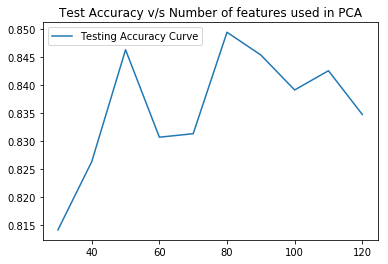

In [31]:
def run_PCA(n_features):
    acc_PCA = []
    for i in n_features:
        pca = PCA(n_components=i).fit(train_data_aug)
        train_data_PCA = pca.transform(train_data_aug)
        train_set_PCA, train_label_PCA, test_set_PCA, test_label_PCA = create_training_and_testing(0.8,train_data_PCA,train_label_aug)
        acc_MLP_PCA ,best_MLP_PCA= run_folds_MLP(train_set_PCA,train_label_PCA,5)
        acc_PCA.append(run_best_fold_MLP(train_set_PCA, train_label_PCA, test_set_PCA, test_label_PCA, best_MLP_PCA, 5))
    plt.plot(n_features,acc_PCA,label="Testing Accuracy Curve")
    plt.legend()
    plt.title("Test Accuracy v/s Number of features used in PCA")
    plt.plot()
    return acc_PCA
acc_PCA = run_PCA([30,40,50,60,70,80,90,100,110,120])
print(acc_PCA)

In the above plot, we can see that we are getting best accuracy for number of features = 80

# Predictions for actual test data

The overall best model is from the augmented training data section and the classifier used is Multi-Layer Perceptron with PCA and using 

In [36]:
def return_test_labels(data, label, test_data, best, num_folds):
    size_fold = int(len(data)/num_folds)
    train_fold_data = []
    train_fold_labels = []
    start = size_fold*best
    end = size_fold*(best+1)
    x = range(start,end)
    for i in range(len(data)):
        if i not in x:
            train_fold_data.append(data[i])
            train_fold_labels.append(label[i])
    clf1 = MLPClassifier().fit(np.array(train_fold_data), np.array(train_fold_labels))
    pred1 = clf1.predict(test_data)
    return copy.deepcopy(pred1.tolist())

### Running the best classifier over the test data

In [37]:
pca = PCA(n_components=80).fit(train_data_aug)
train_data_PCA = pca.transform(train_data_aug)
pca_test = PCA(n_components=80).fit(np.array(actual_test_data))
actual_test_data_PCA = pca_test.transform(np.array(actual_test_data))
train_set_PCA, train_label_PCA, test_set_PCA, test_label_PCA = create_training_and_testing(0.8,train_data_PCA,train_label_aug)
acc_MLP_PCA ,best_MLP_PCA= run_folds_MLP(train_set_PCA,train_label_PCA,5)
final_test_prediction = return_test_labels(train_set_PCA, train_label_PCA, actual_test_data_PCA, best_MLP_PCA, 5)

# Saving Predictions in CSV file

In [41]:
import csv
output_list = []
output_list.append(['image_index','class'])
for q in range(len(final_test_prediction)):
    temp_list = [q,final_test_prediction[q]]
    output_list.append(temp_list)
with open('Ayushmaan_Kaul.csv', 'w') as f:
    wtr = csv.writer(f,lineterminator='\n')
    wtr.writerows(output_list)